## 복습 
지난 시간에 배운 넘파이를 어떻게 사용할 수 있는지에 대해 알아본다

In [ ]:
!pip install pybithumb

     |████████████████████████████████| 51 kB 312 kB/s 
     |████████████████████████████████| 112 kB 9.5 MB/s 
     |████████████████████████████████| 251 kB 42.6 MB/s 


다음 코드를 실행하면 오늘 배울 데이터프레임 자료구조를 얻을 수 있습니다.

In [ ]:
import pybithumb
btc = pybithumb.get_candlestick("BTC")
xrp = pybithumb.get_candlestick("XRP")

`close` 컬럼에는 어제 배운 `ndarray`로 데이터가 저장돼 있습니다.

In [ ]:
btc['close'].values

array([  755000.,   750000.,   739000., ..., 50321000., 49418000.,
       50884000.])

짧은 코드로 시각화도 할 수 있습니다.

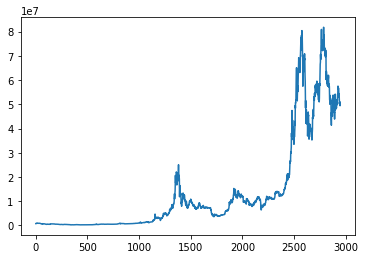

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( len(btc['close'].values) )
plt.plot(x ,  btc['close'].values)

산포도를 그려봅시다.

In [ ]:
len(btc['close'])

2946

In [ ]:
len(xrp['close'])

1786

1000개씩만 그리기 위해 `ndarray`를 슬라이싱합니다.

In [ ]:
btc['close'].values[  -1000: ]

array([11582000., 11252000., 11328000., 11287000., 11309000., 11759000.,
       11850000., 12600000., 12770000., 12738000., 13910000., 13959000.,
       14305000., 14013000., 14140000., 13783000., 13696000., 13703000.,
       13211000., 12730000., 12188000., 12305000., 12530000., 12676000.,
       12940000., 12774000., 12164000., 12213000., 12465000., 12074000.,
       12148000., 12396000., 12218000., 12246000., 11427000., 11644000.,
       11606000., 11576000., 12024000., 12785000., 12470000., 12625000.,
       12915000., 12451000., 12390000., 12318000., 12155000., 12040000.,
       12311000., 12274000., 12273000., 12169000., 12023000., 12086000.,
       12044000., 11754000., 12085000., 11860000., 11874000., 11788000.,
       11327000., 10033000.,  9849000.,  9562000.,  9717000.,  9610000.,
        9854000., 10032000.,  9947000.,  9830000.,  9803000.,  9615000.,
        9493000.,  9739000.,  9747000., 10053000., 10078000.,  9852000.,
        9962000.,  9946000.,  9778000.,  9797000., 

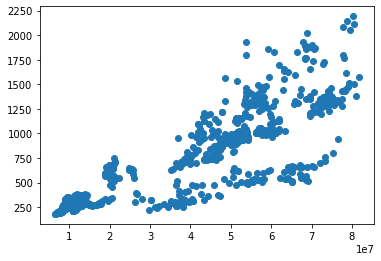

In [ ]:
plt.scatter(btc['close'].values[  -1000: ], xrp['close'].values[  -1000: ])

간단한 `regression`도 할 수 있습니다.
다음 과정에서 다루니 현재 단계에서는 이렇게 응용할 `수` 있다는 것만 확인합시다.

In [ ]:
b = btc['close'].values[-1000:]
b0 = b.reshape(   -1   ,  1  )
b0.shape

(1000, 1)

In [ ]:
b0 = btc['close'].values[-1000:].reshape(   -1   ,  1  )
b0.shape

(1000, 1)

In [ ]:
o = np.ones( (1000, 1), dtype=np.uint32 )
o.shape

(1000, 1)

In [ ]:
a = np.hstack(    (b0, o)     )
a.shape

(1000, 2)

In [ ]:
x = xrp['close'].values[-1000:].reshape(-1, 1)
x.shape

(1000, 1)

In [ ]:
v = np.linalg.pinv(  a  ) @ x
a = v[0, 0]
b = v[1, 0]

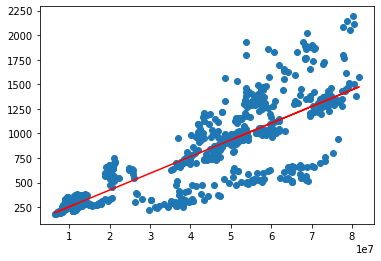

In [ ]:
plt.scatter(btc['close'].values[  -1000: ], xrp['close'].values[  -1000: ])

x = btc['close'].values[  -1000: ]
y = a * x + b
plt.plot( x,   y, color='r')

## 판다스 (Pandas) 라이브러리

Pandas는 데이터 분석을 위한 고수준의 자료구조와 데이터 분석 도구를 제공합니다.  
- 여기서 고수준이란 사용자가 쉽게 데이터를 제어하고 시각화 할 수 있는 메서드를 의미합니다.

판다스는 데이터 분석분야 에서 필수적으로 사용되는 중요한 모듈입니다. 

<img src="https://i.ibb.co/Hh85f7j/series-0.png" width="600" height="400" style="float:left" />

그림출처  
https://plot.ly/pandas/2D-Histogram/  
https://plot.ly/pandas/histograms/

판다스에는 <b>시리즈(Series)</b>와 <b>데이터 프레임 (DataFrame)</b> 두 개의 자료구조를 사용합니다. 
- 1차원 데이터를 관리하는 `Series`
- 2차원 데이터를 관리하는 `DataFrame`

파이썬의 기본자료구조(리스트, 튜플, 딕셔너리)의 부족한 부분을 보완해 보다 고수준으로 만든 자료구조로 numpy의 `ndarray`가 있었습니다.  
ndarray는 수치 연산에 특화돼 있으며, 브로드캐스팅 기능으로 반복문을 사용하지 않고 `ndarray`의 모든 데이터에 연산 적용이 가능했었습니다.  판다스의 자료구조는 `ndarray`를 기반으로 행과 열에 이름을 붙여 가독성을 높이고 보다 범용적인 목적의 데이터를 관리해줍니다.

다양한 방식으로 import 할 수 있는데, 다음 세 가지 형태를 빈번하게 사용합니다. 

In [2]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

### 시리즈 객체

리스트를 사용해서 시리즈 객체로 업그레이드 할 수 있습니다.  
정확히 이야기하면 시리즈 클래스는 생성자로 하나의 리스트를 입력받는 겁니다.  

In [3]:
from pandas import Series
import numpy as np

data = np.array(["가", "나", "다"])
s = Series(data)
print(s)

0    가
1    나
2    다
dtype: object


시리즈 객체는 자동으로 0 부터 시작하는  인덱스가 부여되며, 시리즈 객체를 출력해 보면 인덱스와 맵핑된 값이 한 로우에 표시됩니다. 또한 내부적으로 0부터 시작하는 행번호를 아래 그림과 같이 부여합니다. (행 번호의 쓰임새는 뒤에서 설명하겠습니다.) 즉, 시리즈는 입력된 데이터에 대해 행번호와 인덱스를 부여하고 출력하면 인덱스와 데이터만 표시되는 겁니다. 

<img src="https://i.ibb.co/Xy8Ph47/series-1.png" width="500" style="float:left" />

시리즈 객체를 생성할 때 인덱스 값을 추가할 수 있습니다.  
- index 파라미터에 리스트 형태로 각 값에 대응되는 인덱스를 입력합니다.   
- 반드시 입력된 데이터의 개수와 인덱스의 개수가 동일해야 합니다. 


In [ ]:
class MySeries:
    def __init__(self, data, index):
        pass

s = MySeries(data=[100, 200], index=["x", "y"])

In [ ]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data=data, index=index)
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


시리즈는 0부터 시작하는 행 번호를 부여하고, 인덱스는 사용자가 입력한 문자열을 사용합니다. 

<img src="https://i.ibb.co/FHfknW8/series-2.png" width="500" style="float:left" />

시리즈 객체에는 다양한 속성 (인스턴스 변수)가 있습니다. 

In [ ]:
print(s.index)
print(s.values)
print(s.dtype)

Index(['메로나', '구구콘', '하겐다즈'], dtype='object')
[1000 2000 3000]
int64


In [ ]:
s.index[ [0, 1] ]

Index(['메로나', '구구콘'], dtype='object')

`values`에는 시리즈의 데이터가 `ndarray`로 저장돼 있습니다. 

In [ ]:
s.values

Q. 시가와 고가를 시리즈로 구성하라. 

<img src="https://i.ibb.co/DQzv2sc/series-4.png" width="800" style="float:left" />

In [4]:
# 귀찮아서 임의의 값을 넣었습니다.
시가 = Series(data=[100, 200], index=["2019.01", "2019.2"])
고가= Series(data=[200, 300], index=["2019.01", "2019.2"])

### 시리즈의 인덱싱과 슬라이싱
시리즈의 인덱싱 방법은 세 가지 방법을 사용할 수 있습니다. 
- `iloc`
- `loc`
- `[ ]`

iloc는 "행 번호"를 사용해서 하나의 데이터를 선택합니다. 

In [ ]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data, index=index)

1000

In [ ]:
s.iloc[   -1   ]

3000

loc는 "인덱스"를 사용해서 하나의 데이터를 선택합니다.

In [ ]:
s.loc['메로나']

1000

iloc와 loc를 사용하지 않고 대괄호 `[ ]`를 바로 사용해도, 똑똑한 시리즈 객체는 적절한 값을 반환합니다.

In [ ]:
s['메로나']

1000

In [ ]:
s[0]

1000

리스트의 정수 인덱싱과 딕셔너리의 킷값을 사용한 인덱싱을 섞어 논것과 유사합니다. 

https://wikidocs.net/book/3488

----
하나 이상의 데이터를 가져오는 슬라이싱도 사용할 수 있습니다. 이 때에도 `iloc`와 `loc` 기능을 사용합니다. 

In [ ]:
s

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

In [ ]:
# iloc
print(s.iloc[ : : 2])
print(s.iloc[ [0, 2] ])

메로나     1000
하겐다즈    3000
dtype: int64
메로나     1000
하겐다즈    3000
dtype: int64


In [ ]:
# loc
s.loc[  "메로나" : "구구콘"    ]

구구콘    2000
메로나    1000
dtype: int64

시리즈는 인접하지 않은 불연속적인 데이터를 슬라이싱할 수있습니다. 

In [ ]:
인덱스 = ['구구콘', '메로나']
s.loc[  인덱스  ]

구구콘    2000
메로나    1000
dtype: int64

이러한 코드는 간단하기 때문에 한 줄에 짧게 표현할 수도 있습니다. 

In [ ]:
s.loc[ ['구구콘', '메로나']  ]

구구콘    2000
메로나    1000
dtype: int64

### 시리즈의 수정
딕셔너리의 값을 추가(수정)했던 것과 같이 시리즈도 `iloc` 혹은 `loc`로 데이터에 접근해서 값을 대입하면 됩니다. 다음과 같이 기존에 값이 존재하지 않는다면 데이터가 추가됩니다. 

In [ ]:
딕셔너리 = {    }
딕셔너리['1교시'] = 100
딕셔너리

{'1교시': 100}

In [ ]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data, index=index)
print(s)

s.loc['비비빅'] = 500
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64
메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      500
dtype: int64


In [ ]:
s.iloc[-1] = 100
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      100
dtype: int64


데이터가 존재한다면 값을 업데이트 합니다. 

In [ ]:
s.loc['비비빅'] = 400
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      400
dtype: int64


데이터의 삭제는 `drop` 메서드를 사용합니다. `drop` 메서드는 삭제된 결과를 반환하며, 원본 데이터는 수정하지 않습니다. 이는 실수로 데이터를 삭제할 수 있는 위험을 줄이기 위함입니다. 

In [ ]:
s.drop('비비빅')

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

In [ ]:
s.drop('비비빅', inplace=True)

In [ ]:
s.loc['비비빅'] = 300
s

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      300
dtype: int64

시리즈의 슬라이싱을 응용해서 데이터를 제거할 수도 있습니다. 

In [ ]:
s = s.iloc[:-1]
s

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

오류가 나는 이유는?  
```
시가 = [50700, 50800, 52500, 51300, 50800]
고가 = [51500, 51200, 52500, 51500, 51500]
날짜 = [20191028, 20191025, 20191024, 20191023, 20191022]
a = Series(data = [시가, 고가], index = 날짜 )
print(a)
```

In [ ]:
시가 = [50700, 50800, 52500, 51300, 50800]
고가 = [51500, 51200, 52500, 51500, 51500]
날짜 = [20191028, 20191025, 20191024, 20191023, 20191022]

[시가, 고가]
a = DataFrame(data = [시가, 고가], index = ['a', 'b'] )
print(a)

       0      1      2      3      4
a  50700  50800  52500  51300  50800
b  51500  51200  52500  51500  51500


2차원 데이터라서 시리즈로 처리할 수 없습니다

행 번호의 바로 오른쪽 컬럼만 인덱스 라고 하는건가요?!

In [ ]:
s

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

drop에 어떤 변수 넣어야하는지 다시 좀 보여주세요
- 인덱스를 전달합니다.

In [ ]:
s.drop('메로나')

구구콘     2000
하겐다즈    3000
dtype: int64

In [ ]:
s.drop(['메로나', '구구콘'])

하겐다즈    3000
dtype: int64

시리즈의 행번호는 리스트의 인덱스와 동일하게 생성되나요?
그런데 아까 강사님께서 행번호가 -2, -1, 0 이렇게도 생성될 수 있다고 하셨는데 제가 잘못본걸까요?

In [ ]:
s.iloc[  -1  ]

3000

위 예제에서 다음 코드의 사용 이유는?   
`o = np.ones( (1000, 1), dtype=np.uint32)`

행렬식으로 `비트코인`의 가격을 표현하기 위해서!

### 시리즈의 연산
판다스는 `ndarray`를 기반으로 만들어졌기 때문에 `브로드캐스팅`을 모두 지원합니다. 
연산이 모든 데이터에 적용되는 겁니다. 

In [ ]:
from pandas import Series

s1 = Series([10, 20, 30])
s1 + 10

0    20
1    30
2    40
dtype: int64

시리즈는 `ndarray`와 같이 같은 객체간의 연산을 지원합니다.  

In [ ]:
s1

0    10
1    20
2    30
dtype: int64

In [ ]:
s2 = Series([20, 30, 40])
s2

0    20
1    30
2    40
dtype: int64

In [ ]:
s1 + s2

0    30
1    50
2    70
dtype: int64

시리즈 객체 간의 연산을 할 때는 인덱스가 같아야 합니다. 

In [ ]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
s2 = Series([20, 30, 40])

In [ ]:
s1

가    10
나    20
다    30
dtype: int64

In [ ]:
s2

0    20
1    30
2    40
dtype: int64

In [ ]:
s1 + s2

가   NaN
나   NaN
다   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

Pandas는 결측치를 표현하기 위해 np.nan 값을 사용합니다.   
NaN이란 비어있는 (존재하지 않는) 값입니다.

In [ ]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
s2 = Series([20, 30, 40], index = ["다", "나", "가"])

In [ ]:
s1

가    10
나    20
다    30
dtype: int64

In [ ]:
s2

다    20
나    30
가    40
dtype: int64

In [ ]:
s1 + s2

가    50
나    50
다    50
dtype: int64

In [ ]:
s1 = Series([10, 20, 30, 40], index = ["가", "나", "다", "라"])
s2 = Series([20, 30, 40], index = ["다", "나", "가"])
s3 = s1 + s2
s3

가    50.0
나    50.0
다    50.0
라     NaN
dtype: float64

In [ ]:
s3.loc[   ["다", "나", "가", "라"]  ]

다    50.0
나    50.0
가    50.0
라     NaN
dtype: float64

In [ ]:
import numpy as np

type(np.nan)

float

In [ ]:
np.nan + 4

nan

In [ ]:
np.inf

inf

### 시리즈의 비교연산
모든 데이터에 비교 연산이 적용되고 boolean형 데이터가 저장된 하나의 시리즈가 반환됩니다.

In [ ]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
print(s1 > 20)

가    False
나    False
다     True
dtype: bool


참/거짓이 저장된 조건 시리즈를 얻어 왔다면 값을 필터링 할 수 있겠죠?

In [ ]:
cond = s1 > 20
s1.loc[cond]

다    30
dtype: int64

In [ ]:
s1[cond]

다    30
dtype: int64

In [ ]:
s1.loc[   s1 > 20  ]

다    30
dtype: int64

Q. LG전자의 종가 데이터가 시리즈로 저장돼 있다. LG전자의 주가가 85000원 보다 작을 때의 일자를 출력하라.

In [ ]:
lge = Series([93000, 82400, 99100, 81000, 72300], index = ["05/27", "05/28", "05/29", "05/30", "05/31"])
lge.loc [   lge < 85000  ].index.tolist()

['05/28', '05/30', '05/31']

In [ ]:
cond = lge < 85000
lge.index[cond]

Index(['05/28', '05/30', '05/31'], dtype='object')

In [ ]:
lge.index[lge<85000]

Index(['05/28', '05/30', '05/31'], dtype='object')

Q. LG전자의 종가가 85000원 이하로 떨어진 횟수는?

In [ ]:
len(lge.index[lge<85000])

3

cond는 깔끔하게 표시안되나요?

In [ ]:
s.index.tolist()

['메로나', '구구콘', '하겐다즈']

정리한게 아래와 같습니다.

In [ ]:
lge.index[lge < 85000]

`Nan, null, none은 어떤 차이가 있나요??`
- null : X


In [ ]:
def 함수(x=None):   
    if x == None:
        x = [10, 20, 30]

    print(x)

함수( 10  )

10


함수에 isnull 을 쓰는건 다른 언어를 쓰는분들이 함수를 만들어서 그런건가요?

다른 언어에서 결측값을 null 로 표현하다보니 판다스에서도 `isnull`과 같은 `null`이라는 용어가 등장합니다.

In [ ]:
s.isna()

메로나     False
구구콘     False
하겐다즈    False
dtype: bool

`ndarray`(`Series`)와 메모리
- https://wikidocs.net/160595